### BLEU

In [127]:
import nltk
hypothesis = ['It', 'is', 'a', 'cat', 'at', 'room']
reference = ['It', 'is', 'a', 'cat', 'inside', 'the', 'room']
#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print(BLEUscore)

def BLEUsent(hypothesis, references):
    ref = [x.split(' ') for x in references]
    hyp = hypothesis.split(' ')
    BLEUscore = nltk.translate.bleu_score.sentence_bleu(ref, hyp)
    return BLEUscore

0.4548019047027907


In [17]:
# I should use this library because it's standardized and does tokenization
# more accurately
import sacrebleu

### SARI

In [124]:
from utils.sari import *
fnamenorm   = "./turkcorpus/test.8turkers.tok.norm"
fnamesimp   = "./turkcorpus/test.8turkers.tok.simp"
fnameturk  = "./turkcorpus/test.8turkers.tok.turk."

ssent = "About 95 species are currently accepted ."
csent1 = "About 95 you now get in ."
csent2 = "About 95 species are now agreed ."
csent3 = "About 95 species are currently agreed ."
rsents = ["About 95 species are currently known .", "About 95 species are now accepted .", "95 species are now accepted ."]

print(SARIsent(ssent, csent1, rsents))
print(SARIsent(ssent, csent2, rsents))
print(SARIsent(ssent, csent3, rsents))
print(SARIsent(ssent, csent3, rsents, components=True))

0.2682782411698074
0.5889995423074248
0.5071608864657479
(0.7714826593972436, 0.75, 0.0, 0.5071608864657479)


###  BERTScore

In [129]:
import bert_score as bs

def BERTSCOREsent(hypothesis, references):
    hypothesis_all = [hypothesis for _ in range(len(references))]
    _, _, F1 = bs.score(hypothesis_all, references, lang='en', verbose=True)
    return avg(F1.tolist())

print(BERTSCOREsent(csent1, rsents))

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.49 seconds, 0.86 sentences/sec
0.87


### COMET

In [1]:
# !pip install unbabel-comet
import comet # Import order matters! If you import everything first, you will get a WinError 127 because of incompatible libraries
comet_model_path = comet.download_model('wmt21-comet-mqm')
comet_mqm = comet.load_from_checkpoint(comet_model_path)

Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Encoder model frozen.


In [2]:
import torch
if torch.cuda.is_available():
    torch.cuda.device_count()
    torch.cuda.current_device()
    torch.cuda.device(0)
    print(torch.cuda.get_device_name(0))
else:
    print("No CUDA :(")

NVIDIA GeForce RTX 2070 with Max-Q Design


In [4]:
data = [
    {
        "src": "Dem Feuer konnte Einhalt geboten werden",
        "mt": "The fire could be stopped",
        "ref": "They were able to control the fire."
    },
    {
        "src": "Schulen und Kindergärten wurden eröffnet.",
        "mt": "Schools and kindergartens were open",
        "ref": "Schools and kindergartens opened"
    }
]
# model_output = comet_mqm.predict(data, batch_size=8, gpus=1)
# seg_scores, system_score = model_output.scores, model_output.system_score

# COMET is giving an ambiguous pickle error, likely a problem with imports
# You can paste this code into Google Collab and it'll run fine

### Toy Example

In [130]:
source = "On the fifth day of flight, November 20, 2022, at 19:09 UTC, the Orion spacecraft entered the Lunar sphere of influence, thus the Moon's gravitational force became stronger than Earth's relative to the spacecraft."
simplification = "On November 20, 2022, the Orion spacecraft started to be affected by the Moon's gravity more than Earth's. This happened at 19:09 UTC, after five days of flight."
references = [
    "On the fifth day of flight, the Orion spaceship entered the Lunar sphere of influence. This means that the Moon's gravitational force could influence the spaceship more than the Earth's.",
    "On November 20, 2022, at 19:09 UTC, the Orion spacecraft entered the Lunar sphere of influence. This meant that the Moon was pulling the spacecraft with more gravitational force than the Earth."
]

print(SARIsent(source, simplification, references))
print(BLEUsent(simplification, references))
print(BERTSCOREsent(simplification, references))

0.35050527719306973
0.17490733920105417


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.16 seconds, 12.63 sentences/sec
0.93


### Sub-class Scoring

In [131]:
from utils.all import *
from scipy.stats import kendalltau, pearsonr, spearmanr

data = load_data('../annotated', batch_num=[5, 6], preprocess=True) # [1, 2, 3, 4]

Loading files: ['../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_rachel.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json']

Found users: {'kelly', 'vishnesh', 'vinayak', 'ayush', 'rachel', 'anton'}

anton - Batch 5, HIT 38 (ID 37) has 2 deletion edits but 1 annotations. Likely a missing annotation. Skipping edit type...
vinayak - Batch 6, HIT 16 (ID 45) has 1 insertion edits but -1 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 deletion edits but 3 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 insertion edits but 3 annotations. Likely a missing annotation.

In [3]:
# Get 5 sentence scores considering only content edits
[x['score'] for x in calculate_sentence_scores(data, get_params('quality'))][:5]

[15.505622027546499,
 6.618625370413646,
 17.142427263733406,
 23.840686721928265,
 19.389377758098284]

In [4]:
# Calculate the each score for all unique sentences
# For each sentence, we have 5 generations and 3 annotations per generation
# Of the 5 generations, 2 are ASSET human references, 1 is TurkCorpus human reference

conditions = [
    'quality_content', 
    'quality_syntax', 
    'quality_lexical', 
    'error_content', 
    'error_syntax', 
    'error_lexical', 
    'quality', 
    'error', 
    'all'
]

scores = []
for orig in set([x['original'] for x in data]):
    sents = [x for x in data if x['original'] == orig]

    asset = [x for x in sents if 'asset' in x['system']]
    t5 = [x for x in sents if 'T5' in x['system']][0]

    # Take the SARI score for T5, our best generation with the 2 ASSET human references
    references = [x['simplified'] for x in asset]
    prediction = t5['simplified']
    
    simpeval_score = t5['simpeval_scores']
    if simpeval_score is None:
        continue
    simpeval_score = avg(simpeval_score)

    our_score = t5['score']

    score = {
        'original': orig,
        'references': references,
        'simplified': prediction,
        'system': t5['system'],
        'simpeval': simpeval_score,
        'our_score': our_score
    }

    # The next goal is to calculate a bunch of variations on our score considering only
    # certain dimensions of the metric
    for condition in conditions:
        score[f'our_score_{condition}'] = calculate_sentence_score(t5, get_params(condition))
        
    # Calculate BLEU
    score['bleu'] = BLEUsent(prediction, references)

    # Calculate BERTScore
    score['bertscore'] = BERTSCOREsent(prediction, references)

    # Calculate SARI
    # sari_score = sari.compute(sources=[orig], predictions=[prediction], references=[references])['sari']
    score['sari_add'], score['sari_keep'], score['sari_del'], score['sari'] = SARIsent(orig, prediction, references, components=True)

    scores += [score]

scores[0]

IndexError: list index out of range

In [54]:
# Add COMET scores from Collab
# Write scores to json
with open('scores.json', 'w') as f:
    json.dump(scores, f, indent=4)

In [55]:
# Load json
with open('scores.json', 'r') as f:
    scores = json.load(f)

In [95]:
# Calculate Kendall Tau correlation for each statistic
systems = ['bleu', 'sari', 'bertscore', 'comet', 'simpeval']
all_results = []
prec = 4
for system in systems:
    sys_results = []
    for condition in conditions:
        p = pearsonr([s[f'our_score_{condition}'] for s in scores], [s[system] for s in scores])
        sp = spearmanr([s[f'our_score_{condition}'] for s in scores], [s[system] for s in scores])
        results = (f'{round(sp[0], prec):.4f} & {round(p[0], prec):.4f}')

        # & {round(sp[1], prec)}
        # & {round(p[1], prec)}
        sys_results += [results]
    all_results += [sys_results]

for i, condition in enumerate(conditions):
    line = f'{condition.replace("_", " ").capitalize()} & '
    for j, system in enumerate(systems):
        line += f'{all_results[j][i]} & '
    print(line[:-2] + '\\tabularnewline')

Quality content & 0.1183 & 0.1095 & 0.0495 & -0.0072 & 0.1785 & 0.1045 & 0.0217 & -0.0028 & 0.3223 & 0.3666 \tabularnewline
Quality syntax & -0.1105 & -0.1688 & 0.2515 & 0.2393 & 0.0922 & 0.0529 & -0.0420 & 0.0416 & 0.2646 & 0.1703 \tabularnewline
Quality lexical & 0.0169 & 0.0288 & 0.4031 & 0.2945 & -0.1897 & -0.2661 & -0.4138 & -0.4698 & 0.0537 & -0.1238 \tabularnewline
Error content & -0.0704 & 0.0450 & -0.0335 & 0.0359 & -0.1470 & 0.0329 & -0.0744 & -0.0551 & 0.1676 & 0.0936 \tabularnewline
Error syntax & -0.0397 & -0.0926 & 0.4843 & 0.2871 & -0.0652 & 0.0793 & -0.1952 & -0.1238 & 0.1684 & 0.3030 \tabularnewline
Error lexical & 0.1995 & 0.1065 & 0.1926 & -0.0187 & 0.1029 & 0.0285 & -0.0020 & -0.0918 & 0.2203 & 0.0620 \tabularnewline
Quality & 0.1368 & 0.0509 & 0.2540 & 0.1611 & 0.1697 & 0.0493 & -0.2076 & -0.1026 & 0.4390 & 0.4364 \tabularnewline
Error & -0.0474 & 0.0219 & 0.3015 & 0.1633 & -0.0626 & 0.0732 & -0.1858 & -0.1317 & 0.3667 & 0.2405 \tabularnewline
All & 0.0189 & -0.006

In [ ]:
scores = np.asarray([])
tau, p_value = kendalltau(scores[:, 1], scores[:, 2])
r, p_value = pearsonr(scores[:, 1], scores[:, 2])

### Correlation between Qualtiy and Error

In [20]:
from utils.all import *

data = load_data('../annotated', batch_num=[5, 6], preprocess=True)

Loading files: ['../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_rachel.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json']

Found users: {'ayush', 'anton', 'kelly', 'vishnesh', 'vinayak', 'rachel'}

anton - Batch 5, HIT 38 (ID 37) has 2 deletion edits but 1 annotations. Likely a missing annotation. Skipping edit type...
vinayak - Batch 6, HIT 16 (ID 45) has 1 insertion edits but -1 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 deletion edits but 3 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 insertion edits but 3 annotations. Likely a missing annotation.

In [71]:
# Calculate the each score for all unique sentences
# For each sentence, we have 5 generations and 3 annotations per generation
# Of the 5 generations, 2 are ASSET human references, 1 is TurkCorpus human reference

plt.rcParams["figure.figsize"] = [5, 4]

conditions = [
    'quality_content', 
    'quality_syntax', 
    'quality_lexical', 
    'error_content', 
    'error_syntax', 
    'error_lexical', 
    'quality', 
    'error', 
    'all'
]

scores = []
for sent in data:
    our_score = sent['score']

    score = {
        'original': orig,
        'simplified': prediction,
        'errors': list(set([ann['error_type'] for ann in sent['processed_annotations'] if ann['error_type'] != None])),
        'our_score': our_score
    }

    # The next goal is to calculate a bunch of variations on our score considering only
    # certain dimensions of the metric
    for condition in conditions:
        score[f'our_score_{condition}'] = calculate_sentence_score(sent, get_params(condition))

    scores += [score]

50.68% of sentences are error-less


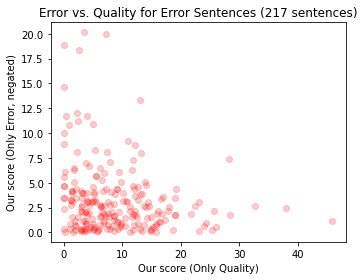

In [58]:
pts = [(score['our_score_quality'], -score['our_score_error']) for score in scores]
print(f'{(100*sum([x[1] == 0 for x in pts]) / len(pts)):.2f}% of sentences are error-less')
pts = [x for x in pts if x[1] > 0]

plt.scatter([p[0] for p in pts], [p[1] for p in pts], c ="red", alpha=0.2)
plt.xlabel('Our score (Only Quality)')
plt.ylabel('Our score (Only Error, negated)')
plt.title(f'Error vs. Quality for Error Sentences ({len(pts)} sentences)')
out_filename = f'img/error-vs-quality.svg'
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show()

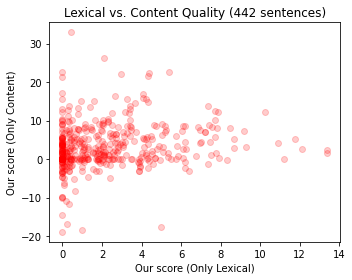

In [61]:
pts = [(score['our_score_quality_lexical'], score['our_score_quality_content']) for score in scores]
plt.scatter([p[0] for p in pts], [p[1] for p in pts], c ="red", alpha=0.2)
plt.xlabel('Our score (Only Lexical)')
plt.ylabel('Our score (Only Content)')
plt.title(f'Lexical vs. Content Quality ({len(pts)} sentences)')
plt.show()

### Components of Simplification

In [ ]:
# graph simplicity/adequacy/fluency vs simpeval score
# graph content/syntax/grammar vs simpeval score
# graph content vs syntax, syntax vs grammar, grammar vs content

In [66]:
data = load_data('../annotated', batch_num=[5, 6], preprocess=True) # [1, 2, 3, 4]
systems = set([x['system'] for x in data])

Loading files: ['../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_rachel.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json']

Found users: {'kelly', 'vishnesh', 'vinayak', 'ayush', 'rachel', 'anton'}

anton - Batch 5, HIT 38 (ID 37) has 2 deletion edits but 1 annotations. Likely a missing annotation. Skipping edit type...
vinayak - Batch 6, HIT 16 (ID 45) has 1 insertion edits but -1 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 deletion edits but 3 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 insertion edits but 3 annotations. Likely a missing annotation.

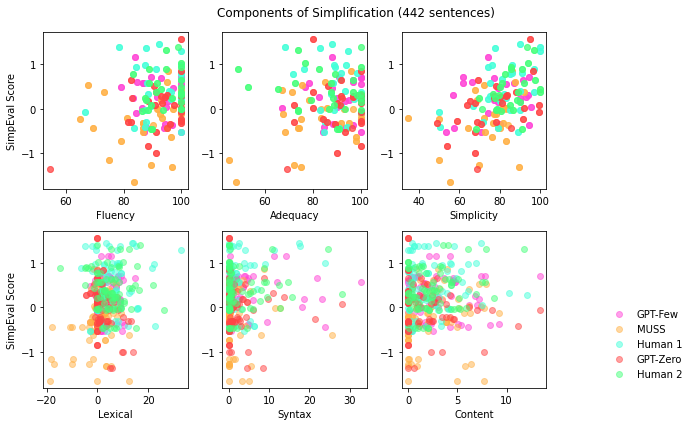

In [67]:
conditions = [
    'quality_content', 
    'quality_syntax', 
    'quality_lexical', 
    'error_content', 
    'error_syntax', 
    'error_lexical', 
    'quality', 
    'error', 
    'all'
]

total_sent = 0
fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=(10, 6))
for system in systems:    
    fluency, adequacy, simplicity = [], [], []
    our_score = []
    for sent in [s for s in data if s['system'] == system]:
        if sent['simpeval_scores'] != None and sent['da_scores'] != None:
            # edit distance
            # scores += [(
            #     avg(sent['simpeval_scores'], prec=10), 
            #     edit_dist(sent['original'], sent['simplified'])
            # )]
            score = {}
            for condition in conditions:
                score[f'our_score_{condition}'] = calculate_sentence_score(sent, get_params(condition))
            
            fluency += [(
                avg([x['fluency'] for x in sent['da_scores']]),
                avg(sent['simpeval_scores'], prec=10)
            )]
            adequacy += [(
                avg([x['adequacy'] for x in sent['da_scores']]),
                avg(sent['simpeval_scores'], prec=10)
            )]
            simplicity += [(
                avg([x['simplicity'] for x in sent['da_scores']]),
                avg(sent['simpeval_scores'], prec=10)
            )]

            out_score = []
            for condition in ['quality_content', 'quality_syntax', 'quality_lexical']:
                out_score += [(
                    score[f'our_score_{condition}'],
                    avg(sent['simpeval_scores'], prec=10)
                )]
            our_score += [out_score]
                

        total_sent += 1
    # scores = [(sent['score'], edit_dist(sent['original'], sent['simplified'])) for sent in data if sent['system'] == system]

    axs[0, 0].scatter([p[0] for p in fluency], [p[1] for p in fluency], c=color_mapping[system], alpha=0.5, label=system_name_mapping[system])
    axs[0, 1].scatter([p[0] for p in adequacy], [p[1] for p in adequacy], c=color_mapping[system], alpha=0.5, label=system_name_mapping[system])
    axs[0, 2].scatter([p[0] for p in simplicity], [p[1] for p in simplicity], c=color_mapping[system], alpha=0.5, label=system_name_mapping[system])

    for i in range(3):
        axs[1, i].scatter([p[i][0] for p in our_score], [p[i][1] for p in our_score], c=color_mapping[system], alpha=0.5, label=system_name_mapping[system])

axs[0, 0].set_ylabel('SimpEval Score')
axs[1, 0].set_ylabel('SimpEval Score')

axs[0, 0].set_xlabel('Fluency')
axs[0, 1].set_xlabel('Adequacy')
axs[0, 2].set_xlabel('Simplicity')

axs[1, 0].set_xlabel('Lexical')
axs[1, 1].set_xlabel('Syntax')
axs[1, 2].set_xlabel('Content')

plt.suptitle(f'Components of Simplification ({total_sent} sentences)')
# font_size = 8
# legend_loc = (0, 0)
# plt.legend(loc='lower center', bbox_to_anchor=legend_loc,
#             fancybox=True, ncol=2, borderaxespad=1.,fontsize=font_size,
#             facecolor='white',edgecolor='black',framealpha=1,frameon=False,
#             columnspacing=1,handlelength=1,handleheight=1,handletextpad=0.4,
#             borderpad=0.2)
plt.legend(loc='lower right', bbox_to_anchor=(2, 0), frameon=False)
plt.show()

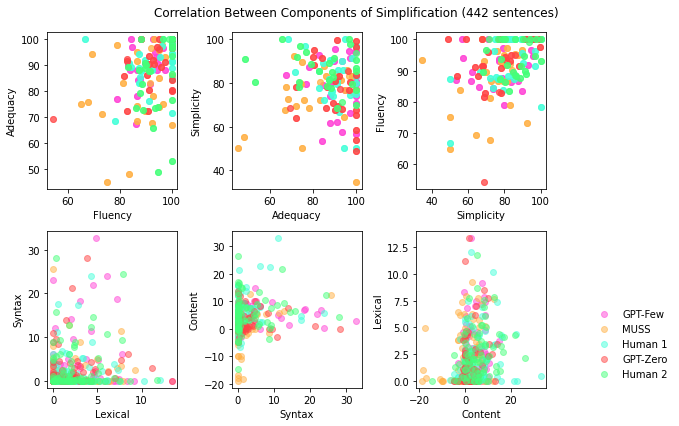

In [63]:
conditions = [
    'quality_content', 
    'quality_syntax', 
    'quality_lexical', 
    'error_content', 
    'error_syntax', 
    'error_lexical', 
    'quality', 
    'error', 
    'all'
]

plots = [[
    ('fluency', 'adequacy'),
    ('adequacy', 'simplicity'),
    ('simplicity', 'fluency')
], [
    ('quality_lexical', 'quality_syntax'),
    ('quality_syntax', 'quality_content'),
    ('quality_content', 'quality_lexical')
]]

total_sent = 0
fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=(10, 6))
for system in systems:    
    pts = []
    for sent in [s for s in data if s['system'] == system]:
        if sent['simpeval_scores'] != None and sent['da_scores'] != None:
            # edit distance
            # scores += [(
            #     avg(sent['simpeval_scores'], prec=10), 
            #     edit_dist(sent['original'], sent['simplified'])
            # )]
            score = {}
            for condition in conditions:
                score[f'our_score_{condition}'] = calculate_sentence_score(sent, get_params(condition))
            
            pts += [[[(
                avg([x['fluency'] for x in sent['da_scores']]),
                avg([x['adequacy'] for x in sent['da_scores']]),
            ), (
                avg([x['adequacy'] for x in sent['da_scores']]),
                avg([x['simplicity'] for x in sent['da_scores']]),
            ), (
                avg([x['simplicity'] for x in sent['da_scores']]),
                avg([x['fluency'] for x in sent['da_scores']]),
            )], [(
                score[f'our_score_quality_lexical'],
                score[f'our_score_quality_syntax'],
            ), (
                score[f'our_score_quality_syntax'],
                score[f'our_score_quality_content'],
            ), (
                score[f'our_score_quality_content'],
                score[f'our_score_quality_lexical']
            )]]]
        total_sent += 1

    for i in range(2):
        for j in range(3):
            axs[i, j].scatter([p[i][j][0] for p in pts], [p[i][j][1] for p in pts], c=color_mapping[system], alpha=0.5, label=system_name_mapping[system])

axs[0, 0].set_xlabel('Fluency')
axs[0, 0].set_ylabel('Adequacy')

axs[0, 1].set_xlabel('Adequacy')
axs[0, 1].set_ylabel('Simplicity')

axs[0, 2].set_xlabel('Simplicity')
axs[0, 2].set_ylabel('Fluency')

axs[1, 0].set_xlabel('Lexical')
axs[1, 0].set_ylabel('Syntax')

axs[1, 1].set_xlabel('Syntax')
axs[1, 1].set_ylabel('Content')

axs[1, 2].set_xlabel('Content')
axs[1, 2].set_ylabel('Lexical')

plt.suptitle(f'Correlation Between Components of Simplification ({total_sent} sentences)')
# font_size = 8
# legend_loc = (0, 0)
# plt.legend(loc='lower center', bbox_to_anchor=legend_loc,
#             fancybox=True, ncol=2, borderaxespad=1.,fontsize=font_size,
#             facecolor='white',edgecolor='black',framealpha=1,frameon=False,
#             columnspacing=1,handlelength=1,handleheight=1,handletextpad=0.4,
#             borderpad=0.2)
plt.legend(loc='lower right', bbox_to_anchor=(2, 0), frameon=False)
plt.show()

In [92]:
# Get the percentile of a score among some systems
from scipy.stats import percentileofscore
system = 'GPT-3-few'
raw_scores = [9, 6.7, 1.46]
i = 0
for dim in ['content', 'syntax', 'lexical']:
    scores = []
    for sent in [x for x in data if system in x['system']]:
        scores += [
            calculate_sentence_score(sent, get_params(f'quality_{dim}')) +
            calculate_sentence_score(sent, get_params(f'error_{dim}'))
        ]

    percentile_of_3 = percentileofscore(scores, raw_scores[i])

    i += 1
    print(percentile_of_3)

91.11111111111111
88.88888888888889
48.888888888888886


In [111]:
raw_score = 0.617
scores = []
system = 'Human'
for sent in [x for x in data if system in x['system']]:
    simpeval_scores = sent['simpeval_scores']
    if simpeval_scores != None:
        scores += [avg(simpeval_scores)]
percentileofscore(scores, raw_score)

65.69767441860465

In [123]:
raw_score = 96.4
scores = []
system = 'GPT-3-few'
for sent in [x for x in data if system in x['system']]:
    if sent['da_scores'] != None:
        da_scores = [avg(x.values()) for x in sent['da_scores']]
        scores += [avg(da_scores)]
percentileofscore(scores, raw_score)

93.10344827586206

### Edit Reversing

In [ ]:
# Problems with reversing edits:
    # Overlapping edits (of different types)
    # Deletions have no mapping to the original sentence
    # Re-orders have no mapping to their original location

In [ ]:
# My approach
    # use generate_token_dict(s) to get a list of token spans for the input/output
    # iterate through edits (in some predetermined priority order) to list the operations we perform on each word
    # perform those operations to collapse the sentence

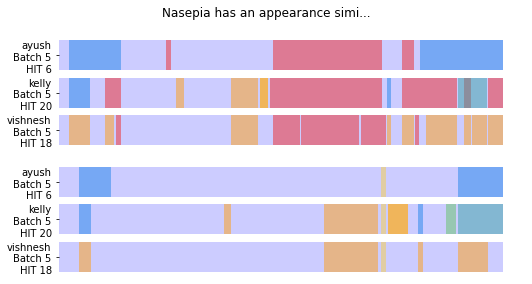

In [ ]:
from graphs import *

id_ = 40
sents = [sent for sent in data if sent['id'] == id_]
draw_agreement(sents)